# Pymaceuticals Inc.
---

### Analysis

Summary statistics should include:

A) A row for each drug regimen. These regimen names should be contained in the index column.


- Capomulin and Ramicane consistently show the most promising results among all treatments, having the smallest average tumor sizes when compared to the other drug regimens. 

- Capomulin and Ramicane display the least fluctuation in tumor sizes, as evidenced by their low variance and standard deviation. This suggests that their outcomes are stable and dependable across different cases.

- Infubinol, Ketapril, Naftisol, Placebo, Propriva, Stelasyn, and Zoniferol typically result in larger average tumor sizes compared to Capomulin & Ramicane. This might indicate that they're not as effective in shrinking tumors as the latter two drugs.


B) A column for each of the following statistics: mean, median, variance, standard deviation, and SEM of the tumor volume.


- Linear Regression: 
    The linear regression analysis indicates that as time progresses, the average tumor size tends to increase. This means there's a direct relationship between the duration and growth of the tumor.
    
- Based on the slope value from the analysis, every day sees a growth of the tumor by approximately 0.95 'mm^3'. This means that for each passing day, the tumor enlarges by this specific amount.    

- Correlation: 
    With a correlation coefficient of 0.84, there's a notably strong link between the passage of time and the growth of the tumor. The closer this number is to 1, the stronger the direct relationship, suggesting that as time goes on, tumor size reliably increases.
    
- The extremely low p-value emphasizes that the connection between time and tumor growth isn't just by chance. Instead, it's a statistically meaningful relationship, affirming that the observed increase in tumor size over time is a genuine effect and not a random occurrence.

- After this cleaning process, the total number of unique mice considered in the study amounted to 248.

- The dataset was refined by eliminating any redundant or repeated data, including removing an extra entry related to mouse ID "g989" to ensure accuracy in the analysis.



 

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = mouse_metadata.merge(study_results, on='Mouse ID', how='outer')

# Display the data table for preview
merged_data.head(4)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1


In [16]:
# Checking the number of mice.
print("Number of unique mice IDs:", len(merged_data['Mouse ID'].unique()))


Number of unique mice IDs: 249


In [19]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Identifying duplicate mice based on 'Mouse ID' and 'Timepoint'
duplicates = merged_data.duplicated(subset=['Mouse ID', 'Timepoint'])
dupe_mice_ids = merged_data[duplicates]['Mouse ID'].unique()

# Result
print(dupe_mice_ids)


['g989']


In [29]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'])]

# First duplicate rows
print("Duplicate Rows:")
duplicate_rows.head()


Duplicate Rows:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data[~merged_data["Mouse ID"].isin(dupe_mice)]

# Count unique mice in the cleaned data
unique_mice_count_cleaned = cleaned_data['Mouse ID'].nunique()


In [36]:
# Checking the number of mice in the clean DataFrame.
print(f"Number of unique mice IDs after cleaning: {unique_mice_count_cleaned}")

Number of unique mice IDs after cleaning: 249


## Summary Statistics

In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_reg = cleaned_data.groupby('Drug Regimen')

# Mean, mode, median, car_vor, std, sem
tumor_vol = drug_reg['Tumor Volume (mm3)']

mean_vol = tumor_vol.mean()
median_vol = tumor_vol.median()
var_vol = tumor_vol.var()
std_vol = tumor_vol.std()
sem_volume = tumor_vol.sem()

# DF
data = {
    'Mean Tumor Volume':mean_vol,
    'Median Tumor Volume': median_vol,
    'Tumor Volume Variance': var_vol,
    'Tumor Volume Std. Dev.': std_vol,
    'Tumor Volume Std. Err.': sem_volume
}

summary_stats = pd.DataFrame(data)
summary_stats = summary_stats.reset_index()

# Displaying DF
print("Summary stats for tumor vol by 'Drug Regimen':")
summary_stats



Summary stats for tumor vol by 'Drug Regimen':


,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [61]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Group data by 'Drug Regimen'
grouped_data = cleaned_data.groupby('Drug Regimen')

# Get the 'Tumor Volume (mm3)' column from the grouped data
tumor_volume_data = grouped_data['Tumor Volume (mm3)']

# Calculate the required statistical metrics
mean_volume = tumor_volume_data.mean()
median_volume = tumor_volume_data.median()
variance_volume = tumor_volume_data.var()
std_dev_volume = tumor_volume_data.std()
sem_volume = tumor_volume_data.sem()

# Combine these metrics into a DataFrame
summary_agg = pd.DataFrame({
    'Mean Tumor Volume': mean_volume,
    'Median Tumor Volume': median_volume,
    'Tumor Volume Variance': variance_volume,
    'Tumor Volume Std. Dev.': std_dev_volume,
    'Tumor Volume Std. Err.': sem_volume
})    

# Display df
print("Summary stats for tumor vol by 'Drug Regimen':")
summary_agg



Summary stats for tumor vol by 'Drug Regimen':


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

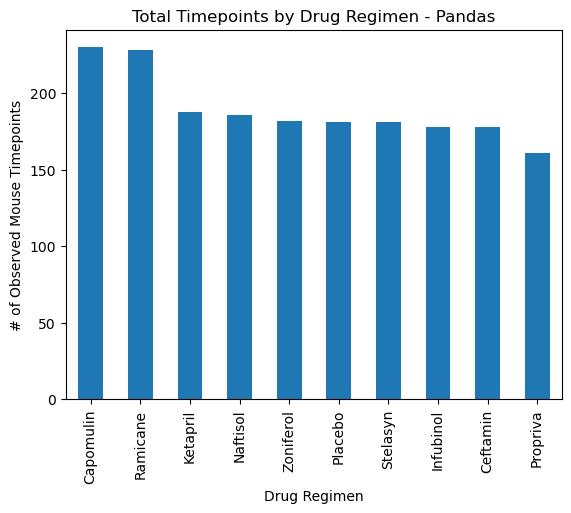

In [65]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Assuming you've imported the necessary libraries
import matplotlib.pyplot as plt

# Calculate the counts of each 'Drug Regimen'
# Plot chart using pandas
drug_counts = cleaned_data['Drug Regimen'].value_counts()
drug_counts.plot(kind='bar')

# Set the title and axis labels
plt.title('Total Timepoints by Drug Regimen - Pandas')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# plt Show
plt.show()


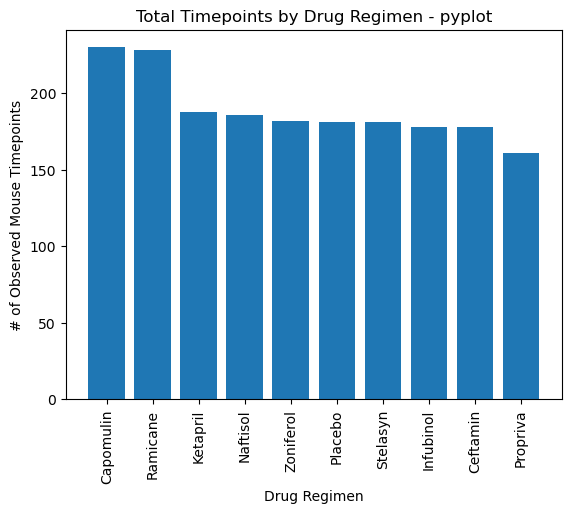

In [74]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Assuming you've imported the necessary libraries
import matplotlib.pyplot as plt
drug_counts = cleaned_data['Drug Regimen'].value_counts()
# Extract the drug names (index) and their counts (values)
drug_names = drug_counts.index
count_values = drug_counts.values
# Create the bar chart using pyplot
plt.bar(drug_names, count_values)
plt.title('Total Timepoints by Drug Regimen - pyplot')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation="vertical")

# plt.show
plt.show()





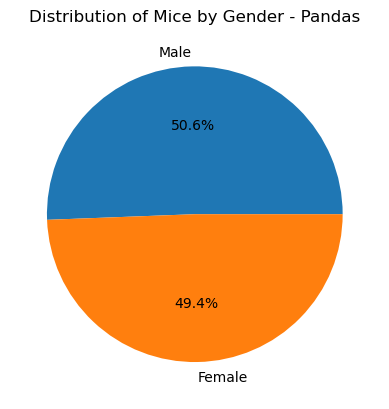

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

import matplotlib.pyplot as plt

gender_counts = cleaned_data['Sex'].value_counts()
# Create the pie chart using pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%')

plt.title('Distribution of Mice by Gender - Pandas')

plt.ylabel('')

# plt.show
plt.show()






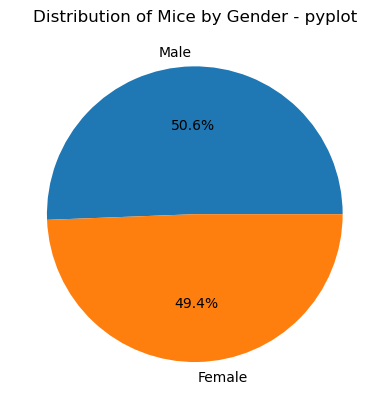

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = cleaned_data['Sex'].value_counts()

plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Mice by Gender - pyplot')
plt.show()


## Quartiles, Outliers and Boxplots

In [88]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = cleaned_data.groupby('Mouse ID')['Timepoint'].max()

# Convert this Series into a DataFrame and reset the index
max_tmpnt_df = max_timepoints.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol_df = pd.merge(max_tmpnt_df, cleaned_data, on=['Mouse ID', 'Timepoint'])

In [95]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_reg = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in treatment_reg:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    tumor_volumes = final_tumor_vol_df[final_tumor_vol_df['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    
    
    # add subset 
    tumor_vol_data.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
  
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Identify and print potential outliers
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    print(f"Potential outliers for {regimen}: {outliers.tolist()}")



    

    
    
    



Potential outliers for Capomulin: []
Potential outliers for Ramicane: []
Potential outliers for Infubinol: [36.3213458]
Potential outliers for Ceftamin: []


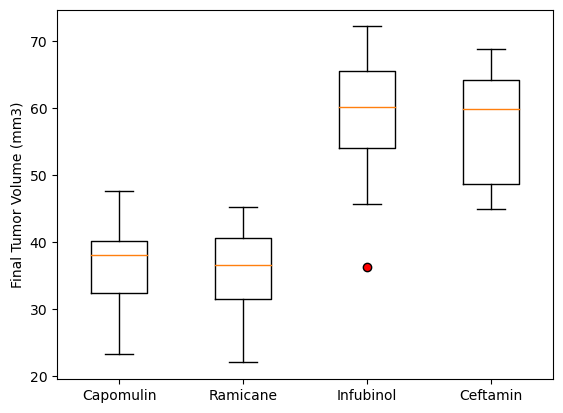

In [99]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt

outlier_marker_properties = {
    'marker': 'o',
    'markerfacecolor': 'red'
}

plt.boxplot(tumor_vol_data, labels=treatment_reg, flierprops=outlier_marker_properties)
plt.ylabel('Final Tumor Volume (mm3)')

# plt show
plt.show()


## Line and Scatter Plots

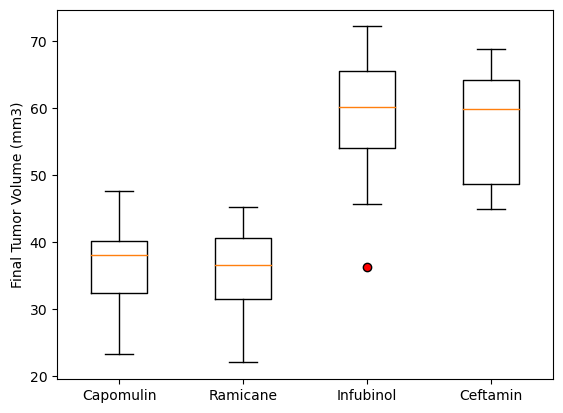

In [101]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
import matplotlib.pyplot as plt

# Define the specific mouse ID and filter the data for that mouse treated with Capomulin
capomulin_mouse_id = 'l509'
specific_mouse_data = cleaned_data[(cleaned_data['Mouse ID'] == capomulin_mouse_id) & (cleaned_data['Drug Regimen'] == 'Capomulin')]

# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt

outlier_marker_properties = {
    'marker': 'o',
    'markerfacecolor': 'red'
}

plt.boxplot(tumor_vol_data, labels=treatment_reg, flierprops=outlier_marker_properties)
plt.ylabel('Final Tumor Volume (mm3)')

# plt show
plt.show()



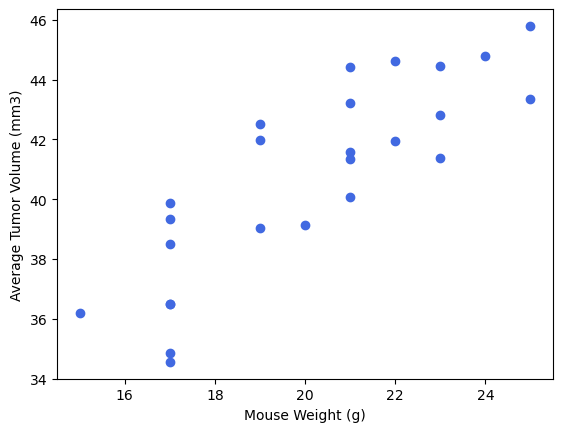

In [102]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt

capomulin_mice = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
average_tumor = capomulin_mice.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

weights = capomulin_mice.groupby('Mouse ID')['Weight (g)'].first()

plt.scatter(weights, average_tumor, color='royalblue')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# plt.show
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


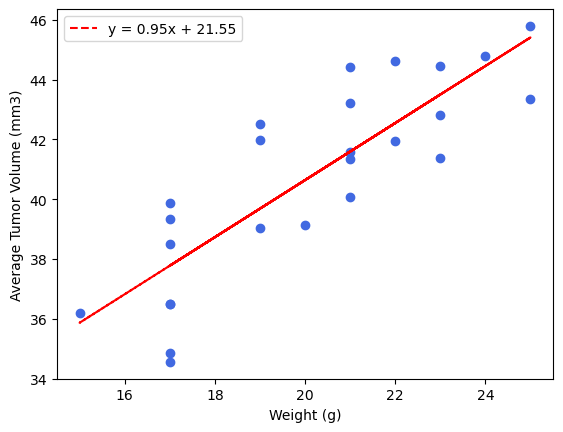

In [104]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

import matplotlib.pyplot as plt
import scipy.stats as st

# Calculate the correlation coefficient
correlation = st.pearsonr(weights, average_tumor)[0]

# Linear regression parameters
(slope, intercept, _, _, _) = st.linregress(weights, average_tumor)

# Regression equation
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot data points
plt.scatter(weights, average_tumor, color='royalblue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


plt.plot(weights, slope * weights + intercept, 'r--', label=equation)
plt.legend()

# Correlation coefficient and plt.show
print(f"The correlation between mouse weight and average tumor volume is {correlation:.2f}")
plt.show()
